In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnuchoudhary2212","key":"01ac28218ad8aebe43429379beb95de5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Cars24.csv')

In [ ]:
df.head()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala


In [ ]:
print("Shape of the DataFrame:", df.shape)
print("\nColumn information:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the DataFrame: (9176, 9)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9176 non-null   int64  
 1   Car Model          9176 non-null   object 
 2   Car Variant        9176 non-null   object 
 3   KM Driven          9176 non-null   int64  
 4   Fuel Type          9176 non-null   object 
 5   Transmission Type  9176 non-null   object 
 6   Ownership          9176 non-null   object 
 7   Price(in Lakhs)    9175 non-null   float64
 8   Location           9173 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 645.3+ KB

Missing values per column:
Year                 0
Car Model            0
Car Variant          0
KM Driven            0
Fuel Type            0
Transmission Type    0
Ownership            0
Price(in Lakhs)      1
Location             3
dtype: int64

In [ ]:
# Fill missing values in 'Price(in Lakhs)' with the median
median_price = df['Price(in Lakhs)'].median()
df['Price(in Lakhs)'].fillna(median_price, inplace=True)

# Fill missing values in 'Location' with the mode
mode_location = df['Location'].mode()[0]
df['Location'].fillna(mode_location, inplace=True)

# Identify potential outliers in 'KM Driven' and 'Price(in Lakhs)' using IQR
for col in ['KM Driven', 'Price(in Lakhs)']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Verify that missing values are handled and check for outliers after capping (optional)
print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nChecking for outliers after capping (should be none beyond bounds):")
for col in ['KM Driven', 'Price(in Lakhs)']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col} after capping: {len(outliers)}")



Missing values after handling:
Year                 0
Car Model            0
Car Variant          0
KM Driven            0
Fuel Type            0
Transmission Type    0
Ownership            0
Price(in Lakhs)      0
Location             0
dtype: int64

Checking for outliers after capping (should be none beyond bounds):
Number of outliers in KM Driven after capping: 0
Number of outliers in Price(in Lakhs) after capping: 0


/tmp/ipython-input-844708569.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price(in Lakhs)'].fillna(median_price, inplace=True)
/tmp/ipython-input-844708569.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

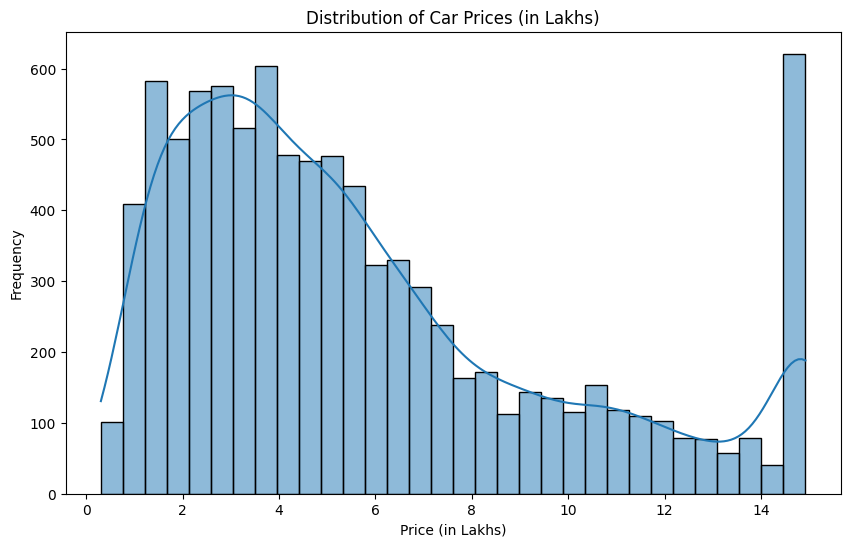

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(in Lakhs)'], kde=True)
plt.title('Distribution of Car Prices (in Lakhs)')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

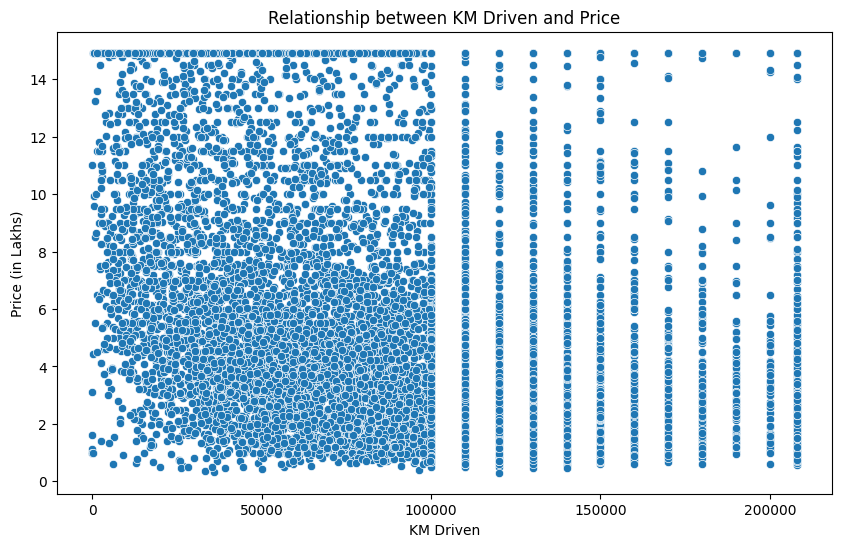

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Driven', y='Price(in Lakhs)', data=df)
plt.title('Relationship between KM Driven and Price')
plt.xlabel('KM Driven')
plt.ylabel('Price (in Lakhs)')
plt.show()

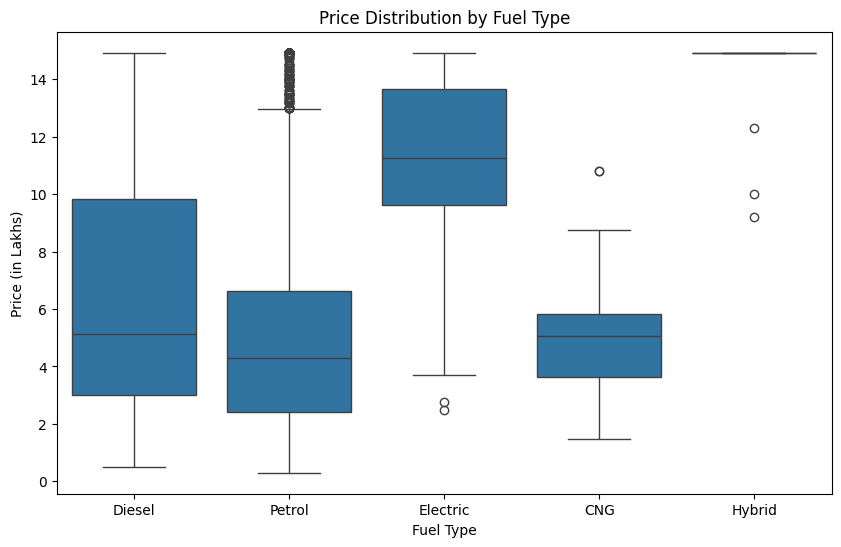

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Price(in Lakhs)', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

In [ ]:
from datetime import datetime

# Calculate Car Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Extract City from Location (simple approach, might need refinement)
# This assumes the last part of the string after the last space is the city
df['City'] = df['Location'].apply(lambda x: x.split(' ')[-1] if isinstance(x, str) else None)

# Extract Brand from Car Model (simple approach, assumes the first word is the brand)
df['Brand'] = df['Car Model'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else None)

# Display the first few rows with the new features
display(df.head())

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location,Car_Age,City,Brand
0,2015,Maruti Swift,ZDI,60660.0,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura,10,Tripura,Maruti
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000.0,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala,6,Agartala,Maruti
2,2021,Mahindra XUV500,W11,48700.0,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura,4,Tripura,Mahindra
3,2015,Maruti OMNI E,8 STR,55800.0,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura,10,Tripura,Maruti
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320.0,Petrol,Manual,1st owner,1.79,Badharghat Agartala,15,Agartala,Volkswagen


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
# Exclude non-numeric and potentially irrelevant columns from X
X = df[['KM Driven', 'Car_Age']] # Using 'KM Driven' and 'Car_Age' as features for simplicity
y = df['Price(in Lakhs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LinearRegression model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 7.983473958589364
R-squared (R2) Score: 0.4818513535191624


In [ ]:
import pandas as pd

# Create a new DataFrame with sample data for prediction
# It must have the same columns as X_train: 'KM Driven' and 'Car_Age'
new_data = pd.DataFrame({
    'KM Driven': [50000, 80000, 30000],
    'Car_Age': [5, 8, 3]
})

# Use the trained model to make predictions
predictions = model.predict(new_data)

# Display the predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[7.56953733 5.60926448 8.8763859 ]


In [2]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [4]:
!git add .

In [5]:
!git commit -m "Initial commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@5d297eb7b543.(none)')


In [6]:
!git remote add origin <https://github.com/vishnu9358862212/Data-visualization-.git>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git remote add origin <https://github.com/vishnu9358862212/Data-visualization-.git>'


In [7]:
!git branch -M main
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'origin'
